In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import SGD 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='whitegrid')

#### Structure
Replicating the same neural network using pytorch

```
        |--> w00 --> b00 -> relu --> w01 --|
        |                                  |
input --|                                  |-- sum -> relu --> output
        |                                  |
        |--> w10 --> b10 -> relu --> w11 --|
```

In [2]:
class BasicNN(nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input) :
        input_to_top_relu = input*self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01

        input_to_bottom_relu = input*self.w10 + self.b10 
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11 

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        return output 

In [3]:
input_doses = torch.linspace(start=0, end = 1, steps = 11)
print(input_doses)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


In [4]:
model = BasicNN()
output_values = model(input_doses)

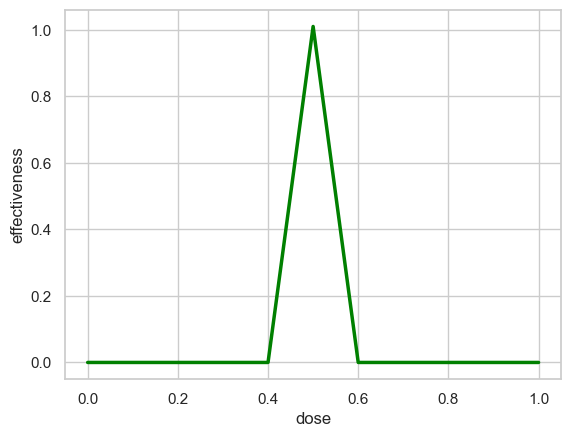

In [5]:
sns.lineplot(
    x = input_doses, y = output_values, 
    color = 'green', linewidth = 2.5
)
plt.ylabel('effectiveness')
plt.xlabel('dose');

#### Training 

In [6]:
class BasicNN_train(nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self, input) :
        input_to_top_relu = input*self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01

        input_to_bottom_relu = input*self.w10 + self.b10 
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11 

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)
        return output 

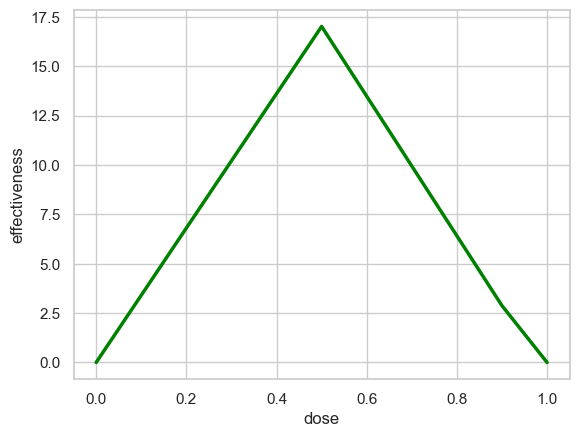

In [7]:
model = BasicNN_train()
output_values = model(input_doses) 
sns.lineplot(
    x = input_doses, y = output_values.detach(), # as it has gradient so we strip the gradient 
    color = 'green', linewidth = 2.5
)
plt.ylabel('effectiveness')
plt.xlabel('dose');

In [8]:
# training data 
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

Final bias, before optimization: tensor(0.)


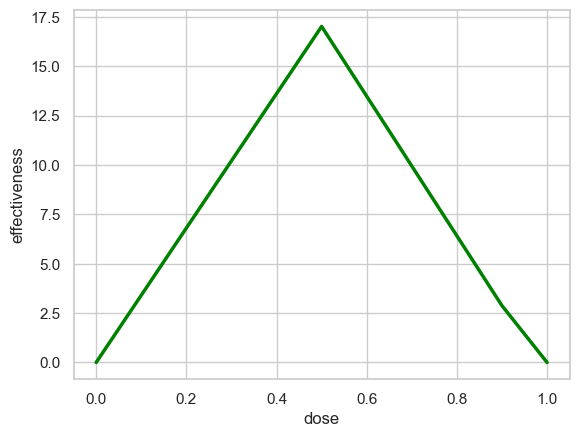

Step:  0  final bias :  tensor(-3.2020)
Step:  1  final bias :  tensor(-5.7636)
Step:  2  final bias :  tensor(-7.8129)
Step:  3  final bias :  tensor(-9.4523)
Step:  4  final bias :  tensor(-10.7638)
Step:  5  final bias :  tensor(-11.8131)
Step:  6  final bias :  tensor(-12.6525)
Step:  7  final bias :  tensor(-13.3240)
Step:  8  final bias :  tensor(-13.8612)
Step:  9  final bias :  tensor(-14.2909)


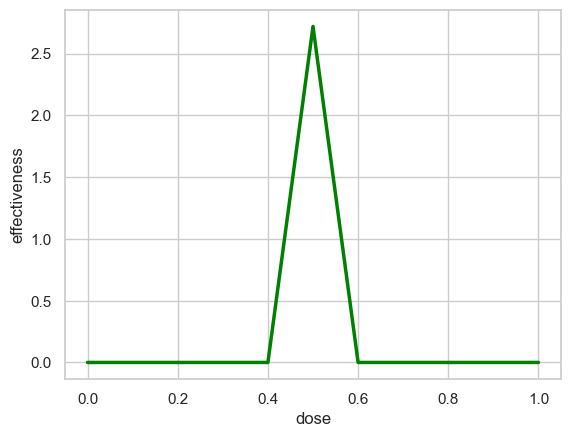

Step:  10  final bias :  tensor(-14.6348)
Step:  11  final bias :  tensor(-14.9098)
Step:  12  final bias :  tensor(-15.1298)
Step:  13  final bias :  tensor(-15.3059)
Step:  14  final bias :  tensor(-15.4467)
Step:  15  final bias :  tensor(-15.5594)
Step:  16  final bias :  tensor(-15.6495)
Step:  17  final bias :  tensor(-15.7216)
Step:  18  final bias :  tensor(-15.7793)
Step:  19  final bias :  tensor(-15.8254)


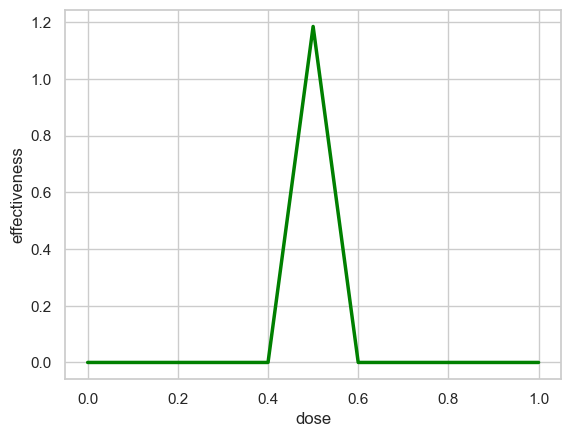

Step:  20  final bias :  tensor(-15.8623)
Step:  21  final bias :  tensor(-15.8919)
Step:  22  final bias :  tensor(-15.9155)
Step:  23  final bias :  tensor(-15.9344)
Step:  24  final bias :  tensor(-15.9495)
Step:  25  final bias :  tensor(-15.9616)
Step:  26  final bias :  tensor(-15.9713)
Step:  27  final bias :  tensor(-15.9790)
Step:  28  final bias :  tensor(-15.9852)
Step:  29  final bias :  tensor(-15.9902)


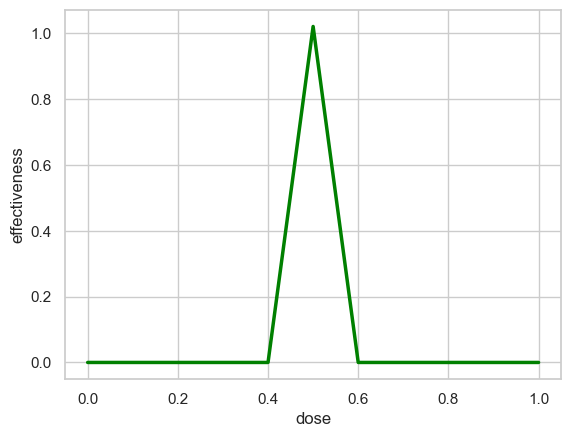

Step:  30  final bias :  tensor(-15.9941)
Step:  31  final bias :  tensor(-15.9973)
Step:  32  final bias :  tensor(-15.9999)
Step:  33  final bias :  tensor(-16.0019)
Step:  34  final bias :  tensor(-16.0035)
Step:  35  final bias :  tensor(-16.0048)
Step:  36  final bias :  tensor(-16.0058)
Step:  37  final bias :  tensor(-16.0067)
Step:  38  final bias :  tensor(-16.0073)
num steps :  39
final bias :  tensor(-16.0073)


In [9]:
optimizer = SGD(model.parameters(), lr = 0.1)

print("Final bias, before optimization: "+str(model.final_bias.data))
for epoch in range(50) : 
    total_loss = 0
    for itr in range(len(inputs)) : 
        input_i = inputs[itr]
        label_i = labels[itr]
        
        output_i = model(input_i)
        loss = (output_i - label_i)**2 # SE

        loss.backward() # gradients get accumulated 

        total_loss += float(loss)

    if total_loss < 0.00001 :
        print("num steps : ", str(epoch))
        break

    if epoch%10 == 0 : 
        output_values = model(input_doses) 
        sns.lineplot(
            x = input_doses, y = output_values.detach(), # as it has gradient so we strip the gradient 
            color = 'green', linewidth = 2.5
        )
        plt.ylabel('effectiveness')
        plt.xlabel('dose')
        plt.show()
    
    optimizer.step()
    optimizer.zero_grad()

    print("Step: ", str(epoch), " final bias : ", str(model.final_bias.data))
print("final bias : ", str(model.final_bias.data))